# Introduction to Data Science
## Homework 3

Student Name: Yiran Xu

Student Netid: yx1350
***

### Part 1
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

![title](./IMG_2662.JPG)

### Part 2 - Preparing a Training Set and Training a Decision Tree
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [1]:
import pandas as pd
import numpy as np
#name each columns
ColNames=['revenue','outcalls','incalls','months','eqpdays','webcap','marryyes','travel','pcown','creditcd','retcalls','churndep']
#load data and give names to each column
allData=pd.read_csv('./cell2cell_data.csv',header=None, names=ColNames) 
#uniform random sample from 0 to 39859 of size (39859*0.8)
indexes_train= np.random.choice(39859,39859*0.8,replace=False) 

train_df=allData.loc[indexes_train]  #select corresponding rows

train_df

#split train and test data
a=np.arange(39859) #make an array from 0 to 39859

new_a=np.delete(a,indexes_train) #remove number selected for training data from the array "a"
test_df=allData.loc[new_a] #select cooresplonding rwos of new_a
#test_df



/Users/yiranxu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [2]:
allData.describe()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
count,39859.000000,39859.000000,39859.000000,39859.000000,39859.000000,39859.000000,39859.000000,39859.000000,39859.000000,39859.000000,39859.000000,39859.000000
mean,58.633816,24.874208,8.011796,18.789332,391.935723,0.895456,0.365338,0.057101,0.185378,0.675908,0.043955,0.499285
std,44.142467,34.702038,16.626837,9.594723,255.609575,0.305968,0.481531,0.232039,0.388609,0.468041,0.224172,0.500006
min,-5.860000,0.000000,0.000000,6.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.370000,3.000000,0.000000,11.000000,212.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.370000,13.000000,2.000000,16.000000,341.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,70.930000,33.330000,8.670000,24.000000,530.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,861.110000,610.330000,519.330000,61.000000,1823.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

We can run a test to see whether the rate of churn in training data is the same as the rate of churn in the whole dataset, and the the rate of churn in testing data is the same as the rate of churn in the whole dataset. That is, P(churn/training)=P(churn) and P(churn/testing)=P(churn).
(This means there is no selection bias. Being in the training set or testing set is independent of being churn or not.)

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [29]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydotplus

from io import StringIO
%matplotlib inline
###

dt = DecisionTreeClassifier(criterion='entropy')
predictor_var=['revenue','outcalls','incalls','months','eqpdays','webcap','marryyes','travel','pcown','creditcd','retcalls']
tree1=dt.fit(train_df[predictor_var],train_df['churndep'])

4\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

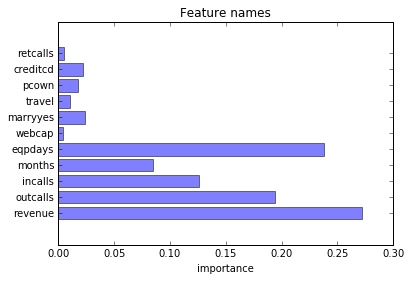

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
importances=tree1.feature_importances_
y_pos = np.arange(len(predictor_var))

plt.barh(y_pos, importances, align='center', alpha=0.5)
plt.yticks(y_pos, predictor_var)
plt.xlabel('importance')
plt.title('Feature names')
 
plt.show() 

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

In [31]:
np.corrcoef(train_df['revenue'],train_df['churndep'])

array([[ 1.        , -0.01235876],
       [-0.01235876,  1.        ]])

The relationship between 'revenue' and churn is negative. 

In [148]:
np.corrcoef(train_df['eqpdays'],train_df['churndep'])

array([[ 1.        ,  0.11375911],
       [ 0.11375911,  1.        ]])

The relationship between 'eqpdays' and churn is positive. 

In [149]:
np.corrcoef(train_df['outcalls'],train_df['churndep'])

array([[ 1.       , -0.0366753],
       [-0.0366753,  1.       ]])

The relationship between 'outcalls' and churn is negative. 

If my marketing director asked you to explain the top 3 drivers of churn, I would say the top three drivers of churn are "Mean monthly revenue in dollars","Number of days the customer has had his/her current equipment" and "Mean number of outbound voice calls". 
Specifically, customers with lower mean monthly revenue are more likely to churn. Customers  having their current equipment for longer period are more likely to churn. Customers making lower number of outbound voice calls are more likely to churn. 


6\. Using the classifier built in 2.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

In [32]:
# Code here
#tree1.predict(train_df[predictor_var])
tree1.score(train_df[predictor_var],train_df['churndep'])

0.99974911405902089

Accuracy on training data is around 0.9998.

In [33]:
tree1.score(test_df[predictor_var],test_df['churndep'])

0.53913697942799799

Accuracy on testing data is around 0.53.

### Part 3 - Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [34]:
# Code here
min_samples_split_values = list(range(100,1010,100)) 
#min_samples_split_values
min_samples_leaf_values = list(range(100,1010,100))

2\. Explain in words your reasoning for choosing the above ranges.

### Answer:
Because there are 39,859 samples in total,which is a big number, the minimum number of samples required to split an internal node(min_samples_split)and the minimum number of samples required to be at a leaf node (min_samples_leaf) should not be too small. 

I feel 100 is a good start to split. "min_samples_split_values" and "min_samples_leaf_values" that are less than 100 might be too small and result in overfitting. 
I use arithmetic sequence with difference=100 to generate the 10 values, so it's easier to see the changes in prediction due to changes in mim_samples_split and min_samples_leaf.

After plotting the AUC using my chosen range for mim_samples_split and min_samples_leaf, I feel my choices is reasonable. We can see AUC rises to a peak and drops down ("sweet plt") among all number of leaves. 

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score
# Code here
def testTrees(X_train, y_train, X_test, y_test, split, leaf, auc):
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = leaf, min_samples_split = split)
    clf = clf.fit(X_train, y_train)
    if (auc==0):
        cm = confusion_matrix(clf.predict(X_test), y_test)
        return (cm[0][0] + cm[1][1]) / float(sum(cm))
    else:
        return roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

In [36]:
lab = 'churndep'

splits = min_samples_split_values
leaves = min_samples_leaf_values

#Run all of the options
run=1
if (run == 1):
    #Initialize dictionary of results
    res = dict()
    for d in splits:
        res[d] = list()

    #Now train and get results for each option
    for d in splits:
        for l in leaves:
            res[d].append(testTrees(train_df.drop(lab, 1), train_df[lab], test_df.drop(lab, 1), test_df[lab], d, l, 1))
            

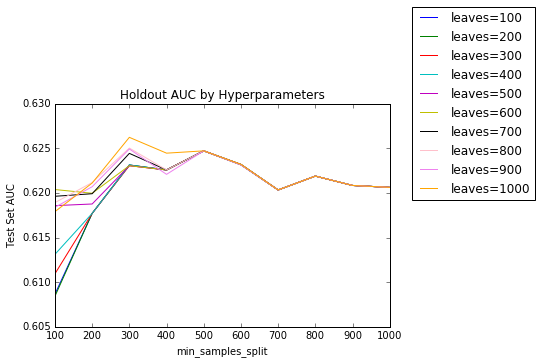

In [37]:
#Plot AUC as a measure of accuracy          
fig = plt.figure()
ax=fig.add_subplot(111)
b=np.arange(0,10) #
colors=['b','g','r','c','m','y','k','pink','violet','orange']
for l,i in zip(b,range(len(colors))):
    plt.plot(splits,res[splits[i]], colors[l], label = 'leaves={}'.format(leaves[i]))
#label = 'leaves={}'.format(leaves[i]  
                 #colors[l]
plt.legend(bbox_to_anchor=(1.25, 1),loc = 10)
ax.set_xlabel('min_samples_split')
ax.set_ylabel('Test Set AUC')
plt.title('Holdout AUC by Hyperparameters')

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

In [38]:
# Code here
def testTreesAccuracy(X_train, y_train, X_test, y_test, split, leaf, auc):
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = leaf, min_samples_split = split)
    clf = clf.fit(X_train, y_train)
    if (auc==0):
        cm = confusion_matrix(clf.predict(X_test), y_test)
        return (cm[0][0] + cm[1][1]) / float(sum(cm))
    else:
        return clf.score(X_test, y_test)

In [39]:

#Run all of the options
run=1
if (run == 1):
    #Initialize dictionary of results
    res1 = dict()
    for d in splits:
        res1[d] = list()

    #Now train and get results for each option
    for d in splits:
        for l in leaves:
            res1[d].append(testTreesAccuracy(train_df.drop(lab, 1), train_df[lab], test_df.drop(lab, 1), test_df[lab], d, l, 1))


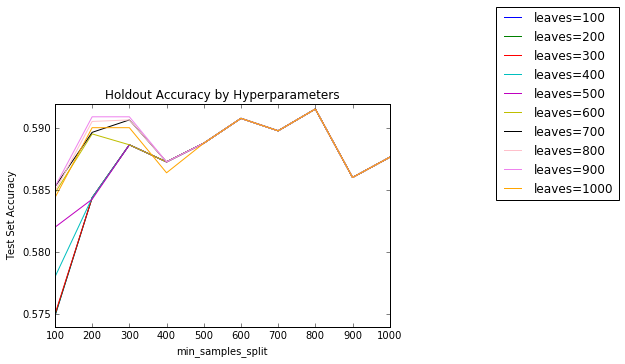

In [40]:
fig = plt.figure()
ax=fig.add_subplot(111)
b=np.arange(0,10) #
colors=['b','g','r','c','m','y','k','pink','violet','orange']
for l,i in zip(b,range(len(colors))):
    plt.plot(splits,res1[splits[i]], colors[l], label = 'leaves={}'.format(leaves[i]))
#label = 'leaves={}'.format(leaves[i]  
                 #colors[l]
plt.legend(bbox_to_anchor=(1.5, 1),loc = 10)
ax.set_xlabel('min_samples_split')
ax.set_ylabel('Test Set Accuracy')
plt.title('Holdout Accuracy by Hyperparameters')

### Answer:
Combined the accuracy plot and the AUC plot I plotted before, the best configuration is when min_samples_leaf_values is around 900, min_samples_split is around 300.
The best accuracy is around 0.60. 


5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

### Answer:
By using this model, we can increase the prediction of churn. Thus, we can focus our effort of campaiging to people that are likely to churn, and avoid randome campign or massive campaign, which costs a lot and inefficient. Thus, with limited budget, we can improve churn better than without using this model.

Moreover, by identifying top drivers of churn, we can focus our effort to specific areas. By identifying the top driver of churn as revenue and their relationship is negative, we can know that the higher one's monthly reveunue is, the less likely one would churn. Thus, on one hand, we can focus our target market to people with higher income and investiage what they need to better serve them.In this way, we can reduce churn rate without paying a huge cost to campaignining to customers that will possibly churn. On the other hand, we can focus our effort of campaigning to customers with lower revenue to prevent them from churning. Thus, the churn rate will be reduced from two perspeectives.

Second, by identifying the second top drive of churn as number of days one has his/her current equipment and their relationship is positive, we can know that the longer one owns an equipment, the more likely one would churn. The reason might be that the contract of customers ends and they do not really satisfy with the company's service or rate. It is also possible that competitors provide attractive deals for customers to turn to competitors. 
Thus, our company should investigate further into the reasons why old customers churn. Maybe our company should design an attractive deal, maybe discount rate, to keep old customers. Thus, the churn rate should decrease. 



